In [ ]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 17.4 MB/s eta 0:00:00


In [ ]:
pip install --upgrade keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: keras-tuner
    Found existing installation: keras-tuner 1.2.0
    Uninstalling keras-tuner-1.2.0:
      Successfully uninstalled keras-tuner-1.2.0


In [ ]:
pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [ ]:
pip install keras-tuner==1.2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.2 MB/s eta 0:00:00


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# Load your dataset
data = pd.read_csv(r'/content/drive/MyDrive/merged_file.csv')  # Replace with your file path
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Use the 'Return' column as the target variable
returns = data['Return'].dropna()

In [ ]:
import pandas as pd
import requests

# Alpha Vantage API key
API_KEY = 'GA76MXDGXN914A0W'

# Function to fetch macroeconomic data from Alpha Vantage
def fetch_alpha_vantage_data(function, symbol=None):
    base_url = 'https://www.alphavantage.co/query'
    params = {
        'function': function,
        'apikey': API_KEY
    }
    if symbol:
        params['symbol'] = symbol
    response = requests.get(base_url, params=params)
    data = response.json()
    return data

# Fetch macroeconomic data
interest_rate_data = fetch_alpha_vantage_data(function='FEDERAL_FUNDS_RATE')
gdp_growth_data = fetch_alpha_vantage_data(function='REAL_GDP')
inflation_data = fetch_alpha_vantage_data(function='CPI')
print(interest_rate_data)
# Convert to DataFrames
interest_rate = pd.DataFrame(interest_rate_data['data'])
gdp_growth = pd.DataFrame(gdp_growth_data['data'])
inflation = pd.DataFrame(inflation_data['data'])

# Clean and format the data
interest_rate['date'] = pd.to_datetime(interest_rate['date'])
interest_rate.set_index('date', inplace=True)
interest_rate['value'] = pd.to_numeric(interest_rate['value'], errors='coerce')

gdp_growth['date'] = pd.to_datetime(gdp_growth['date'])
gdp_growth.set_index('date', inplace=True)
gdp_growth['value'] = pd.to_numeric(gdp_growth['value'], errors='coerce')

inflation['date'] = pd.to_datetime(inflation['date'])
inflation.set_index('date', inplace=True)
inflation['value'] = pd.to_numeric(inflation['value'], errors='coerce')

# Combine into a single DataFrame
macro_data = pd.DataFrame({
    'Interest Rate': interest_rate['value'],
    'GDP Growth': gdp_growth['value'],
    'Inflation': inflation['value']
})
macro_data.dropna(inplace=True)

# Load the stock dataset
# data = pd.read_csv(r'/content/drive/MyDrive/merged_file.csv')  # Replace with your file path
# data['Date'] = pd.to_datetime(data['Date'])
# data.set_index('Date', inplace=True)

# # Merge macroeconomic data with stock data
# data = data.merge(macro_data, left_index=True, right_index=True, how='left')
# data.dropna(inplace=True)  # Drop rows with missing macroeconomic data

# # Save the merged dataset to a file
# data.to_csv('merged_data.csv')

# print("Merged data saved to 'merged_data.csv'.")

{'name': 'Effective Federal Funds Rate', 'interval': 'monthly', 'unit': 'percent', 'data': [{'date': '2024-12-01', 'value': '4.48'}, {'date': '2024-11-01', 'value': '4.64'}, {'date': '2024-10-01', 'value': '4.83'}, {'date': '2024-09-01', 'value': '5.13'}, {'date': '2024-08-01', 'value': '5.33'}, {'date': '2024-07-01', 'value': '5.33'}, {'date': '2024-06-01', 'value': '5.33'}, {'date': '2024-05-01', 'value': '5.33'}, {'date': '2024-04-01', 'value': '5.33'}, {'date': '2024-03-01', 'value': '5.33'}, {'date': '2024-02-01', 'value': '5.33'}, {'date': '2024-01-01', 'value': '5.33'}, {'date': '2023-12-01', 'value': '5.33'}, {'date': '2023-11-01', 'value': '5.33'}, {'date': '2023-10-01', 'value': '5.33'}, {'date': '2023-09-01', 'value': '5.33'}, {'date': '2023-08-01', 'value': '5.33'}, {'date': '2023-07-01', 'value': '5.12'}, {'date': '2023-06-01', 'value': '5.08'}, {'date': '2023-05-01', 'value': '5.06'}, {'date': '2023-04-01', 'value': '4.83'}, {'date': '2023-03-01', 'value': '4.65'}, {'date

In [ ]:
macro_data.to_csv('macro_data.csv')

In [1]:
import pandas as pd

# Load the macro_data DataFrame
macro_data = pd.read_csv(r'/content/drive/MyDrive/macro_data.csv')  # Replace 'macro_data.csv' with your file path

# Ensure the 'date' column is in datetime64[ns] format
macro_data['date'] = pd.to_datetime(macro_data['date'], format='%Y-%m-%d')

# Set the 'date' column as the index
macro_data.set_index('date', inplace=True)

# Verify the index
print("Macro Data Index:")
print(macro_data.index)

# Verify the DataFrame structure


Macro Data Index:
DatetimeIndex(['1955-01-01', '1956-01-01', '1957-01-01', '1958-01-01',
               '1959-01-01', '1960-01-01', '1961-01-01', '1962-01-01',
               '1963-01-01', '1964-01-01', '1965-01-01', '1966-01-01',
               '1967-01-01', '1968-01-01', '1969-01-01', '1970-01-01',
               '1971-01-01', '1972-01-01', '1973-01-01', '1974-01-01',
               '1975-01-01', '1976-01-01', '1977-01-01', '1978-01-01',
               '1979-01-01', '1980-01-01', '1981-01-01', '1982-01-01',
               '1983-01-01', '1984-01-01', '1985-01-01', '1986-01-01',
               '1987-01-01', '1988-01-01', '1989-01-01', '1990-01-01',
               '1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01',
               '1995-01-01', '1996-01-01', '1997-01-01', '1998-01-01',
               '1999-01-01', '2000-01-01', '2001-01-01', '2002-01-01',
               '2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2

In [ ]:
# Convert macro_data to a dictionary: {year: {Interest Rate: X, GDP Growth: Y, Inflation: Z}}
macro_dict = macro_data.groupby(macro_data.index.year).first().to_dict(orient='index')

In [2]:
# Load the stock dataset
data = pd.read_csv(r'/content/drive/MyDrive/merged_file.csv')  # Replace with your file path
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Merge macroeconomic data with stock data
# data = data.merge(macro_data, left_index=True, right_index=True, how='left')
# data.dropna(inplace=True)  # Drop rows with missing macroeconomic data

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Stock,Macd,Macd_Signal,Return,Rsi,Volatility
Date,,,,,,,,,,,,
2002-02-20,20.028612,21.316166,20.028612,20.643776,17.754581,7024900.0,A,-0.564911,-0.703869,0.107869,53.930432,0.586696
2002-02-20,86.267700,88.622643,86.147552,87.973831,67.761444,1514400.0,AA,0.345131,-0.203684,0.038581,57.389682,0.377003
2002-02-20,2.060000,2.190000,2.060000,2.190000,2.023804,300.0,AAME,-0.068111,-0.075604,0.000000,51.213557,0.797065
2002-02-20,4.933333,4.933333,4.933333,4.933333,4.613485,0.0,AAN,0.220614,0.225360,0.000000,65.632980,0.502426
2002-02-20,2.632428,2.719342,2.632428,2.714074,2.305438,87000.0,AAON,-0.007262,-0.006858,0.040909,48.335447,0.418702


In [ ]:
macro_data.head()

,Interest Rate,GDP Growth,Inflation
date,,,
1955-01-01,1.39,3083.026,26.7
1956-01-01,2.45,3148.765,26.8
1957-01-01,2.84,3215.065,27.6
1958-01-01,2.72,3191.216,28.6
1959-01-01,2.48,3412.421,29.0


In [ ]:
macro_data.index = macro_data.index.year  # Ensure index is just the year (integer)

In [ ]:
print("Values in macro_data.index before cleaning:")
print(macro_data.index)

Values in macro_data.index before cleaning:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68],
      dtype='int64')


Processing stock: A
Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - loss: 0.3314 - mse: 0.3314 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0061 - val_mse: 0.0061
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.0080 - val_mse: 0.0080
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 0.0108 - val_mse: 0.0108
Epoch 9/10
127/127 ━━━━━

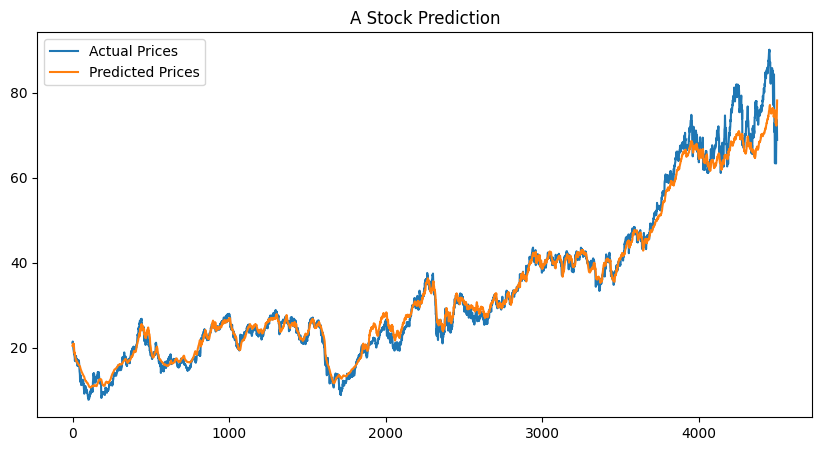

Model for stock A saved. Moving to the next stock...

Processing stock: AA
Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - loss: 0.4296 - mse: 0.4296 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 8.7261e-04 - val_mse: 8.7261e-04
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 0.0149 - mse: 0.0149 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0130 - mse: 0.0130 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0087 - mse: 0.0087 

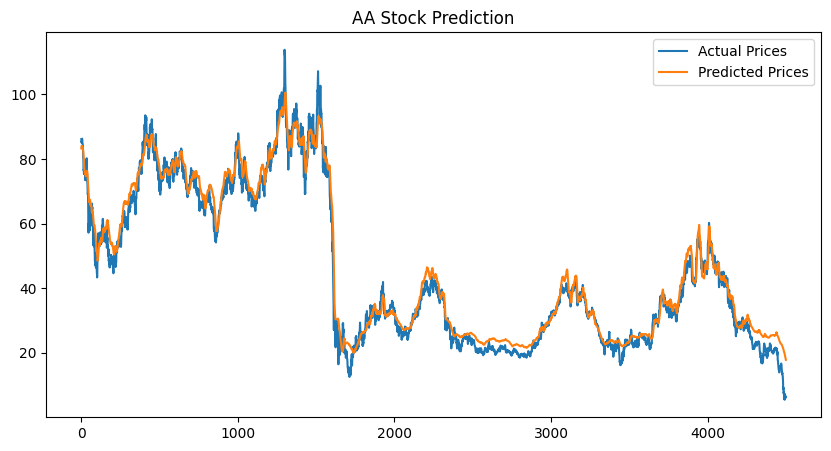

Model for stock AA saved. Moving to the next stock...

Processing stock: AAME
Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - loss: 0.5524 - mse: 0.5524 - val_loss: 0.0396 - val_mse: 0.0396
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.0317 - val_mse: 0.0317
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - loss: 0.0162 - mse: 0.0162 - val_loss: 0.0189 - val_mse: 0.0189
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0136 - mse: 0.0136 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0118 - mse: 0.0118 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.0106 - mse: 0.0106 - 

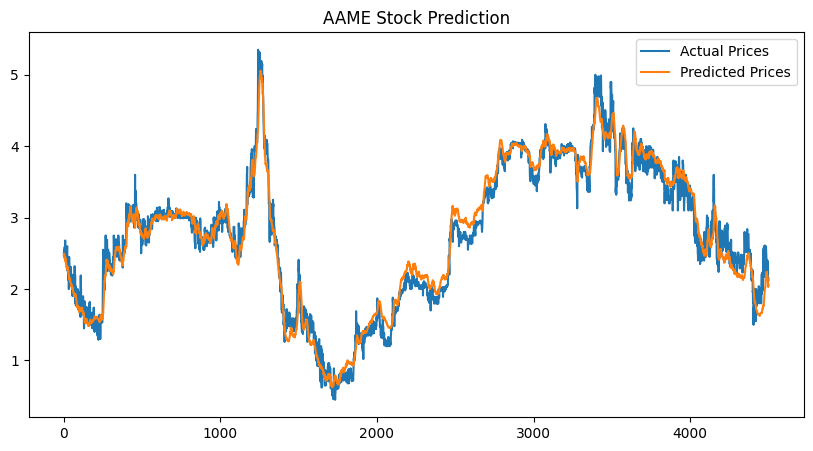

Model for stock AAME saved. Moving to the next stock...

Processing complete.


In [10]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, LSTM, concatenate, LayerNormalization, MultiHeadAttention
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Suppress TensorFlow warnings for better readability
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Load datasets (replace with your actual file paths)
#data = pd.read_csv("path_to_stock_data.csv", parse_dates=['Date'], index_col='Date')
#macro_data = pd.read_csv("path_to_macro_data.csv", parse_dates=['date'], index_col='date')

# Ensure macroeconomic data frequency matches stock data
macro_data = macro_data.resample('D').ffill()

# Extract list of unique stocks
stocks = data['Stock'].unique()

# Prepare directory for saving models
if not os.path.exists("saved_models"):
    os.makedirs("saved_models")

# Define function to preprocess data for a single stock
def preprocess_data(stock_data, macro_data):
    # Merge with macroeconomic data
    stock_data = stock_data.join(macro_data, how='left')

    # Feature scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(stock_data)

    # Prepare inputs and outputs
    X, y = [], []
    time_window = 60  # Look-back window
    for i in range(time_window, len(scaled_data)):
        X.append(scaled_data[i - time_window:i])
        y.append(scaled_data[i][3])  # Target is the normalized 'Close' price

    return np.array(X), np.array(y), scaler

# Define CNN-Transformer model
def build_model(input_shape):
    # Input for stock time series
    stock_input = Input(shape=input_shape)

    # CNN block
    cnn_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(stock_input)
    cnn_layer = Dropout(0.2)(cnn_layer)
    cnn_output = Flatten()(cnn_layer)

    # Transformer block
    transformer_input = LayerNormalization()(stock_input)
    attention_layer = MultiHeadAttention(num_heads=4, key_dim=64)(transformer_input, transformer_input)
    attention_output = LayerNormalization()(attention_layer)

    # Dense layer after Transformer
    attention_output = Flatten()(attention_output)

    # Concatenate CNN and Transformer outputs
    concatenated = concatenate([cnn_output, attention_output])

    # Dense layers for final output
    dense_layer = Dense(64, activation='relu')(concatenated)
    dense_layer = Dropout(0.2)(dense_layer)
    output = Dense(1)(dense_layer)

    # Define the model
    model = Model(inputs=stock_input, outputs=output)
    model.compile(optimizer='adam', loss='mse', metrics=['mse'])

    return model

# Process each stock one by one
# List of stocks to process
stocks_to_process = ['A', 'AA', 'AAME']

# Process only the selected stocks
for stock in stocks_to_process:
    if stock not in stocks:
        print(f"Stock {stock} not found in the dataset. Skipping...")
        continue

    print(f"Processing stock: {stock}")

    # Filter data for the current stock
    stock_data = data[data['Stock'] == stock].drop(columns=['Stock'])

    # Preprocess data
    X, y, scaler = preprocess_data(stock_data, macro_data)

    # Skip stock if not enough data
    if X.shape[0] == 0:
        print(f"Not enough data for stock {stock}, skipping...")
        continue

    # Build the model
    model = build_model(input_shape=(X.shape[1], X.shape[2]))

    # Train the model
    history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

    predictions = model.predict(X)
    # Determine the number of features the scaler was fitted on
    n_features = scaler.min_.shape[0]
    dummy_pred = np.zeros((predictions.shape[0], n_features))
    dummy_pred[:, 3] = predictions[:, 0]  # Adjust index if needed
    predictions_inv = scaler.inverse_transform(dummy_pred)[:, 3]
    dummy_actual = np.zeros((y.shape[0], n_features))
    dummy_actual[:, 3] = y.reshape(-1)
    actual_prices = scaler.inverse_transform(dummy_actual)[:, 3]
    # Compute RMSE on the original scale
    rmse = np.sqrt(mean_squared_error(actual_prices, predictions_inv))
    print(f"RMSE for {stock}: {rmse:.2f}")

    # Plot predictions vs actual prices
    plt.figure(figsize=(10, 5))
    plt.plot(actual_prices, label='Actual Prices')
    plt.plot(predictions_inv, label='Predicted Prices')
    plt.title(f'{stock} Stock Prediction')
    plt.legend()
    plt.show()

    # Save the model
    model.save(f"saved_models/{stock}_model.h5")
    print(f"Model for stock {stock} saved. Moving to the next stock...\n")

print("Processing complete.")


In [4]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=c4edd3407ae03286bde5d4cd811daa96ae6c6902288b9eb24d290e2d75c1ffcf
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta
